 <div style="text-align:center; color:green; font-size:40px;">House Price Prediction</div>

<img src="Yellow and Black Real Estate Promotion Instagram Post (1).png" alt="Example Image" style="width:600px;height:400px;">


## Call Librairies:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Data Cleaning & Preprocessing & EDA:

In [2]:
# Load the Dataset:
data=pd.read_csv('Bengaluru_House_Data.csv')
df1=data.copy()
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
area_type,13320,4,Super built-up Area,8790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability,13320,81,Ready To Move,10581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,13319,1305,Whitefield,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,13304,31,2 BHK,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
society,7818,2688,GrrvaGr,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sqft,13320,2117,1200,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath,13247.0,NaN,NaN,NaN,2.69261,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,NaN,NaN,NaN,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,NaN,NaN,NaN,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [6]:
df2=df1.drop(['area_type','availability','society','balcony'],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# Handle Missing Values:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

## Handling Incorrect or Inconsestent Data:


In [10]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
# location:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [12]:
df3['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [13]:
loc=df3['location'].value_counts()
loc_less_than10=loc[loc<=10]
df3['location']=df3['location'].apply(lambda x: 'other' if x in loc_less_than10 else x)
df3['location'].value_counts()

location
other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [14]:
# Size column:
df3['bhk']=df3['size'].apply(lambda x:x.strip('')[0])
df4=df3.drop('size',axis=1)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [15]:
df4['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '9'], dtype=object)

In [16]:
df4['bhk'].value_counts()

bhk
2    5528
3    4832
4    1396
1     673
5     353
6     221
7     100
8      89
9      54
Name: count, dtype: int64

In [17]:
# Total Square per Feet column:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float (x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df4[~df4['total_sqft'].apply(is_float)].head()


,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [20]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
df5=df4.copy()
def convert_sqft_to_num(x):
    z=x.split('-')
    if len(z)==2:
        return(float(z[0])+float(z[1]))/2
    try:
        return float(x)
    except:
        return None
df5['total_sqft']=df5['total_sqft'].astype(str).apply(convert_sqft_to_num)

df6=df5[df5['total_sqft'].notnull()]
df6.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [22]:
# bathroom column:
df6['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [23]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13200 non-null  float64
 3   price       13200 non-null  float64
 4   bhk         13200 non-null  object 
dtypes: float64(3), object(2)
memory usage: 618.8+ KB


In [24]:
#convert bhk column to a float type:
df6['bhk']=df6['bhk'].astype(float)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   total_sqft  13200 non-null  float64
 2   bath        13200 non-null  float64
 3   price       13200 non-null  float64
 4   bhk         13200 non-null  float64
dtypes: float64(4), object(1)
memory usage: 618.8+ KB


## Handle Outliers:

<Axes: xlabel='total_sqft'>

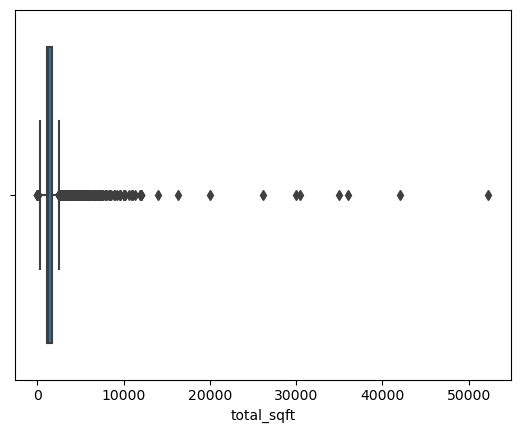

In [25]:
# Detecte total_sqft ouliers:
sns.boxplot(data=df6,x='total_sqft')

<Axes: xlabel='total_sqft'>

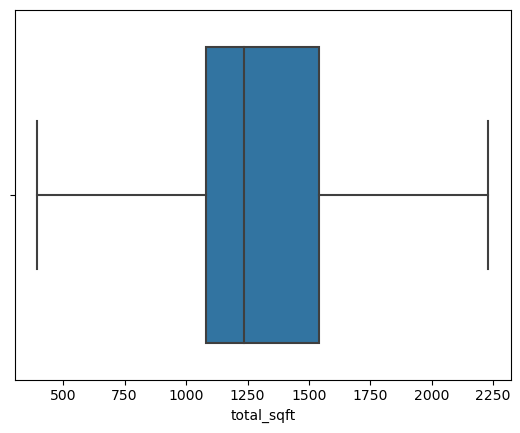

In [26]:
# Remove total_sqft outliers using IQR:
Q1=df6['total_sqft'].quantile(0.25)
Q3=df6['total_sqft'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upp=Q3+1.5*IQR
df7=df6[(df6['total_sqft']<=upp)&(df6['total_sqft']>=lower)]
#confirme that oultiers are removed:
sns.boxplot(data=df7,x='total_sqft',showfliers=False)

In [27]:
df6.shape

(13200, 5)

In [28]:
df7.shape

(12051, 5)

<Axes: xlabel='bath'>

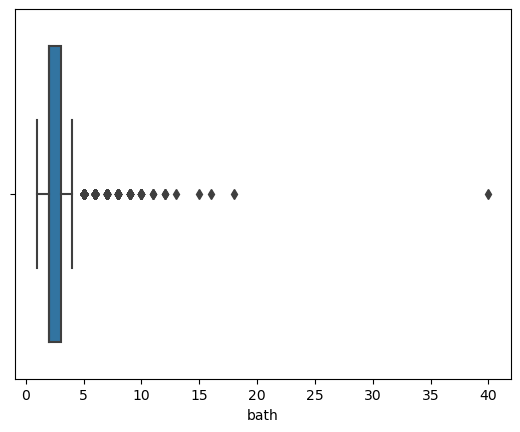

In [29]:
# Remove the bath outliers:
sns.boxplot(data=df7,x='bath')

<Axes: xlabel='bath'>

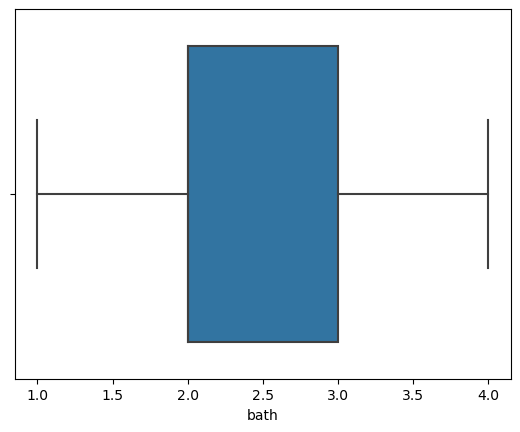

In [30]:
Q1=df7['bath'].quantile(0.25)
Q3=df7['bath'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
df8=df7[(df7['bath']<=upp)&(df7['bath']>=low)]
sns.boxplot(data=df8,x='bath')

In [31]:
df8.shape

(11498, 5)

<Axes: xlabel='price'>

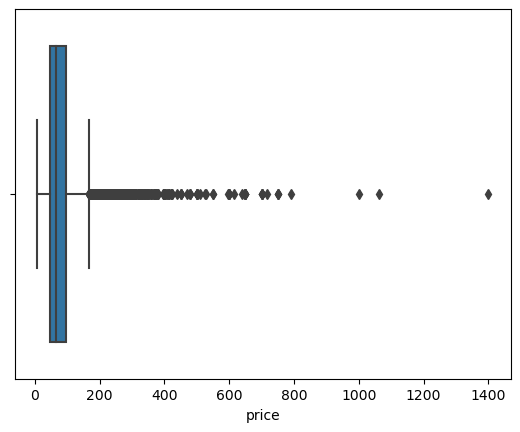

In [32]:
# Remove the price outliers:
sns.boxplot(data=df8,x='price')

<Axes: xlabel='price'>

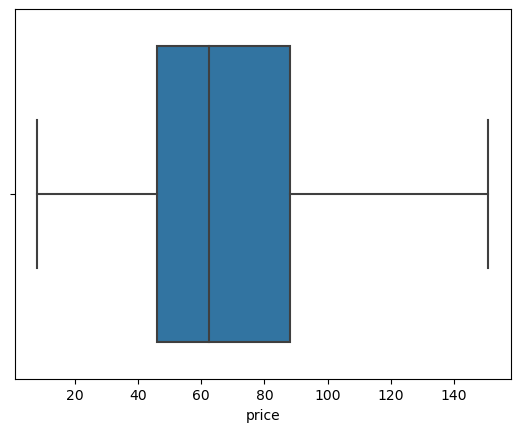

In [33]:
Q1=df8['price'].quantile(0.25)
Q3=df8['price'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
df9=df8[(df8['price']<=upp)&(df8['price']>=low)]
sns.boxplot(data=df9,x='price',showfliers=False)

In [34]:
df9.shape

(10752, 5)

In [35]:
df9.head(3)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0


<Axes: xlabel='bhk'>

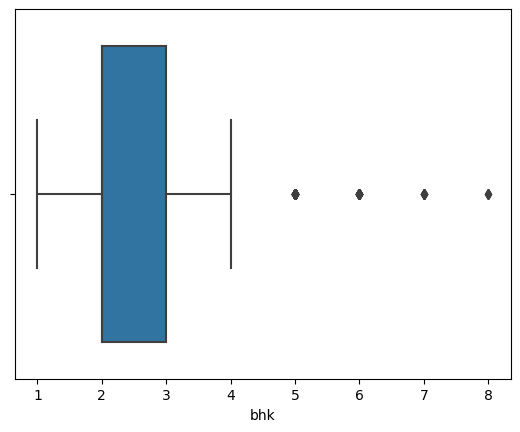

In [36]:
# Remove the bhk outliers:
sns.boxplot(data=df9,x='bhk')

<Axes: xlabel='bhk'>

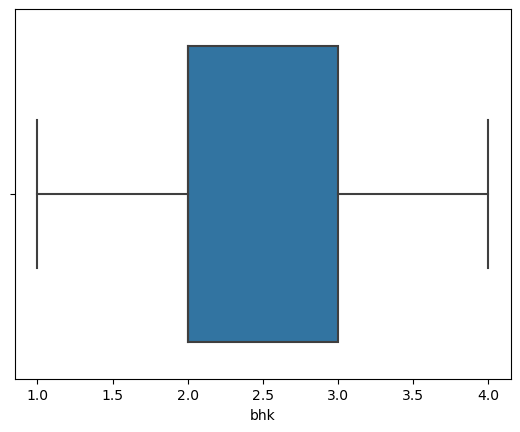

In [37]:
Q1=df9['bhk'].quantile(0.25)
Q3=df9['bhk'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
df10=df9[(df9['bhk']<=upp)&(df9['bhk']>=low)]
sns.boxplot(data=df10,x='bhk')

In [38]:
df10.shape

(10653, 5)

In [39]:
df10['pr_sqft']=df10['price']*100000/df10['total_sqft']
df10.head()

,location,total_sqft,bath,price,bhk,pr_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,38.00,2.0,3247.863248


<Axes: xlabel='pr_sqft'>

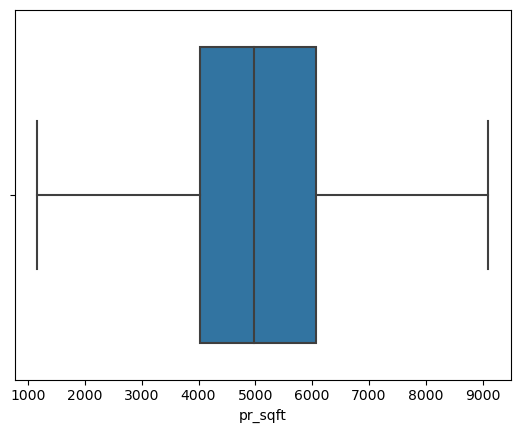

In [40]:
Q1=df10['pr_sqft'].quantile(0.25)
Q3=df10['pr_sqft'].quantile(0.75)
IQR=Q3-Q1
low=Q1-1.5*IQR
upp=Q3+1.5*IQR
df70=df10[(df10['pr_sqft']<=upp)&(df10['pr_sqft']>=low)]
sns.boxplot(data=df70,x='pr_sqft',showfliers=False)

### Save The Clean Datasets:

In [41]:
df10.to_csv('House Price Clean Data.csv',index=False)

# Create Machine Learning Model:

### Scaling Numerical Features & Encoded Categorical variables:

In [42]:
df11=df70.copy()
df11.head()

,location,total_sqft,bath,price,bhk,pr_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,38.00,2.0,3247.863248


In [43]:
# Encoded datasets:
df12=pd.get_dummies(df11['location'],dtype=int)
df12.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
df13=df11.drop('location',axis=1)
df13.head()

,total_sqft,bath,price,bhk,pr_sqft
0,1056.0,2.0,39.07,2.0,3699.810606
2,1440.0,2.0,62.00,3.0,4305.555556
3,1521.0,3.0,95.00,3.0,6245.890861
4,1200.0,2.0,51.00,2.0,4250.000000
5,1170.0,2.0,38.00,2.0,3247.863248


In [45]:
# Concatenate Datasets:
df14=pd.concat([df13,df12],axis=1)
df14.head()

,total_sqft,bath,price,bhk,pr_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2.0,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3.0,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2.0,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2.0,3247.863248,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
# Scale Feature with MinMaxScaler:
scaler=MinMaxScaler()
normalized=scaler.fit_transform(df14)
df15=pd.DataFrame(normalized,columns=df14.columns)
df15.head()

,total_sqft,bath,price,bhk,pr_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0.347594,0.333333,0.195409,0.333333,0.303848,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.518717,0.333333,0.339623,0.666667,0.376506,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.554813,0.666667,0.547170,0.666667,0.609248,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.411765,0.333333,0.270440,0.333333,0.369843,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.398396,0.333333,0.188679,0.333333,0.249637,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Save Scale and Encoded Datasets:
df15.to_csv('HS Datasets Scaling & Encoded.csv',index=False)

###  Split The Datasets:

In [48]:
df=df14.copy()
df.head()

,total_sqft,bath,price,bhk,pr_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2.0,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3.0,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,95.00,3.0,6245.890861,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,51.00,2.0,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1170.0,2.0,38.00,2.0,3247.863248,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# Choose dependent & independent variables:
## Input features:
X=df.drop('price',axis=1)
## Output feature:
y=df['price']


In [50]:
# Split the Datasets:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


### Build the First Model: Ridge Regression()

In [51]:
# Call the Model:
m1=Ridge()

# Cross Validation:
cv1=KFold(n_splits=5,shuffle=True,random_state=42)

# Hyperparameter tunning:
params1={
    'alpha':[0.01,0.1,1,10,100]
}

gs1=GridSearchCV(m1,param_grid=params1,cv=cv1,scoring='neg_mean_squared_error')

# Fit the Datasets:
gs1.fit(X_train,y_train)

# Choose best estimators:
model1=gs1.best_estimator_

# y_train_ pred & y_test_pred:
y_train_pred= model1.predict(X_train)
y_test_pred=model1.predict(X_test)

# Evaluate the Model:
Train_rmse1=np.sqrt(mean_squared_error(y_train,y_train_pred))
Test_rmse1=np.sqrt(mean_squared_error(y_test,y_test_pred))
Train_r21=r2_score(y_train,y_train_pred)
Test_r21=r2_score(y_test,y_test_pred)


d1=pd.DataFrame({
    "Model":[model1.__class__.__name__],
    "best prameters":[gs1.best_params_],
    "best Score":[gs1.best_score_],
    "Train RMSE":[Train_rmse1],
    "Test RMSE":[Test_rmse1],
    "Train R2":[Train_r21],
    "Test R2":[Test_r21]
})
d1

,Model,best prameters,best Score,Train RMSE,Test RMSE,Train R2,Test R2
0,Ridge,{'alpha': 10},-25.827499,4.957057,5.17169,0.972875,0.971717


### Build the Second Model: Lasso Regression()

In [52]:
# Call the Model:

m2=Lasso()

# Cross Validation:

cv2=KFold(n_splits=5,shuffle=True,random_state=42)

# Hyperparameter tunning:

params2={
    'alpha':[0.01,0.1,1,10,100]
}
gs2=GridSearchCV(m2,param_grid=params2,cv=cv2,scoring='neg_mean_squared_error')

# Fit the Datasets:

gs2.fit(X_train,y_train)

# Choose best estimators:

model2=gs2.best_estimator_

# y_train_ pred & y_test_pred:

y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

# Evaluate the Model:

Train_rmse2=mean_squared_error(y_train,y_train_pred)
Test_rmse2=mean_squared_error(y_test,y_test_pred)
Train_r22=r2_score(y_train,y_train_pred)
Test_r22=r2_score(y_test,y_test_pred)

d2=pd.DataFrame({
   "Model":[model2.__class__.__name__],
   "best prameters":[gs2.best_params_],
   "best Score":[gs2.best_score_],
   "Train RMSE":[Train_rmse2],
   "Test RMSE":[Test_rmse2],
   "Train R2":[Train_r22],
   "Test R2": [Test_r22]
})
d2

,Model,best prameters,best Score,Train RMSE,Test RMSE,Train R2,Test R2
0,Lasso,{'alpha': 0.01},-26.415327,25.982732,27.793016,0.971318,0.97061


### Build the Thirth Model: RandomRegression()

In [53]:
# Call the Model:

m3=RandomForestRegressor()

# Cross Validation:

cv3=KFold(n_splits=5,shuffle=True,random_state=42)

# Hyperparameter tunning:

params3={
    'max_depth': [None,2,5],
    'min_samples_split': [2,4,6,8]
}

gs3=GridSearchCV(m3,param_grid=params3,scoring='neg_mean_squared_error')

# Fit the Datasets:

gs3.fit(X_train,y_train)

# Choose best estimators:

model3=gs3.best_estimator_

# y_train_ pred & y_test_pred:

y_train_pred=model3.predict(X_train)
y_test_pred=model3.predict(X_test)

# Evaluate the Model:

Train_rmse3=mean_squared_error(y_train,y_train_pred)
Test_rmse3=mean_squared_error(y_test,y_test_pred)
Train_r23=r2_score(y_train,y_train_pred)
Test_r23=r2_score(y_test,y_test_pred)

d3=pd.DataFrame({
   "Model":[model3.__class__.__name__],
   "best prameters":[gs3.best_params_],
   "best Score":[gs3.best_score_],
   "Train RMSE":[Train_rmse3],
   "Test RMSE":[Test_rmse3],
   "Train R2":[Train_r23],
   "Test R2": [Test_r23]
})
d3

,Model,best prameters,best Score,Train RMSE,Test RMSE,Train R2,Test R2
0,RandomForestRegressor,"{'max_depth': None, 'min_samples_split': 2}",-0.659575,0.084035,0.472887,0.999907,0.9995


In [54]:
# All Models with Metrics:
Models=pd.concat([d1,d2,d3],axis=0,ignore_index=True)
Models.index=Models.index+1
Models

,Model,best prameters,best Score,Train RMSE,Test RMSE,Train R2,Test R2
1,Ridge,{'alpha': 10},-25.827499,4.957057,5.171690,0.972875,0.971717
2,Lasso,{'alpha': 0.01},-26.415327,25.982732,27.793016,0.971318,0.970610
3,RandomForestRegressor,"{'max_depth': None, 'min_samples_split': 2}",-0.659575,0.084035,0.472887,0.999907,0.999500


***Recommendations:***

-**Random Forest Regressor** is the best-performing model, with the lowest RMSE and highest 𝑅2 on both train and test sets. However, it may need tuning to reduce potential overfitting.

-**Ridge Regression** offers a simpler model with slightly lower performance but still generalizes well.

***Next Steps:***

-**For Ridge:** Consider exploring a broader range of alpha values.

-**For Random Forest:** Tune hyperparameters like max_depth, min_samples_split, and n_estimators to optimize performance and reduce overfitting.

-**For Lasso:** Itmay not be suitable for this dataset, but increasing alpha slightly might improve regularization.

###  Analyze the Overfitting & Underfittig:

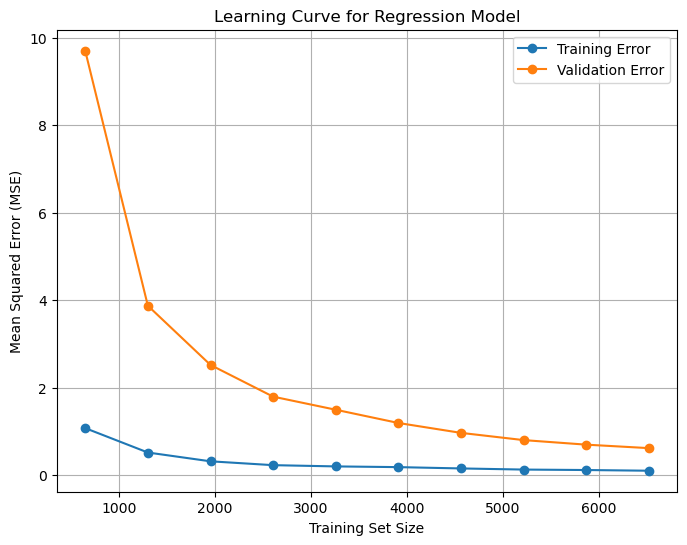

In [55]:
from sklearn.model_selection import learning_curve
# Initialize the regression model
model = model3

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Training set sizes (10% to 100%)
    cv=cv3,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use negative MSE (higher is better in sklearn)
    shuffle=True,
    random_state=42
)

# Convert negative MSE to positive
train_errors = -train_scores.mean(axis=1)
val_errors = -val_scores.mean(axis=1)

# Plotting the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
plt.plot(train_sizes, val_errors, label='Validation Error', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Learning Curve for Regression Model')
plt.legend()
plt.grid(True)
plt.show()


# Predict New Data:

In [59]:
def predict_price(location,sqft,bath,bhk):
    
    # Find the index of the location:
    
    loc_index=np.where(X.columns==location)[0][0]
    
    # Create a zero vector for the input:
    
    m=np.zeros(len(X.columns))
    
    # Setting Numerical features:
    
    m[0]=sqft
    m[1]=bath
    m[2]=bhk
    if loc_index>0:
        m[loc_index]=1
        
    # Making Prediction:
    
    return model3.predict([m])[0]

In [60]:
predict_price('1st Block Jayanagar',2000,2,2)

38.5831

# Export the model & Columns:

In [61]:
# Export the model to pickle File:
import pickle
with open('House Price Model.pickle','wb') as f:
    pickle.dump(model,f)

In [69]:
# Export column information to a json File:
import json
columns={
    'data columns':[col.lower() for col in X.columns]
}
with open('column.json','w') as f:
    json.dump(columns,f,indent=4)